# Implement K-NN for classification

Optimal k-value: 3


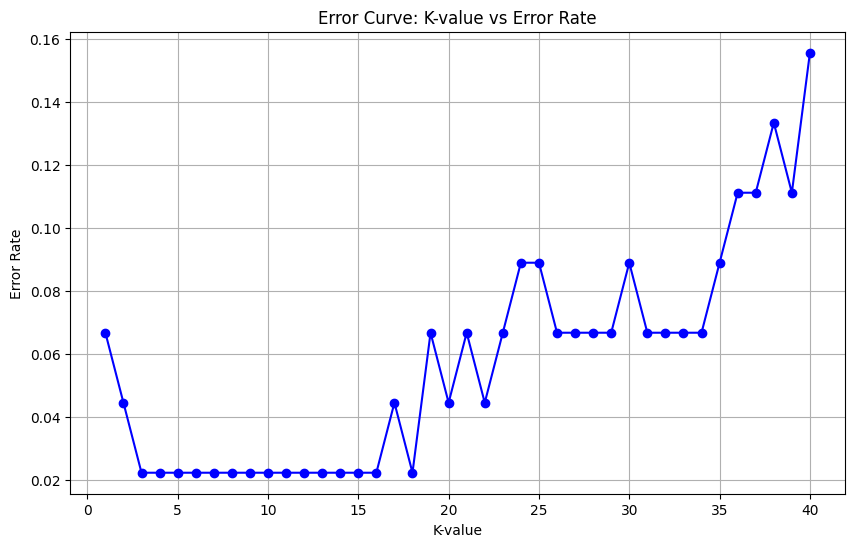

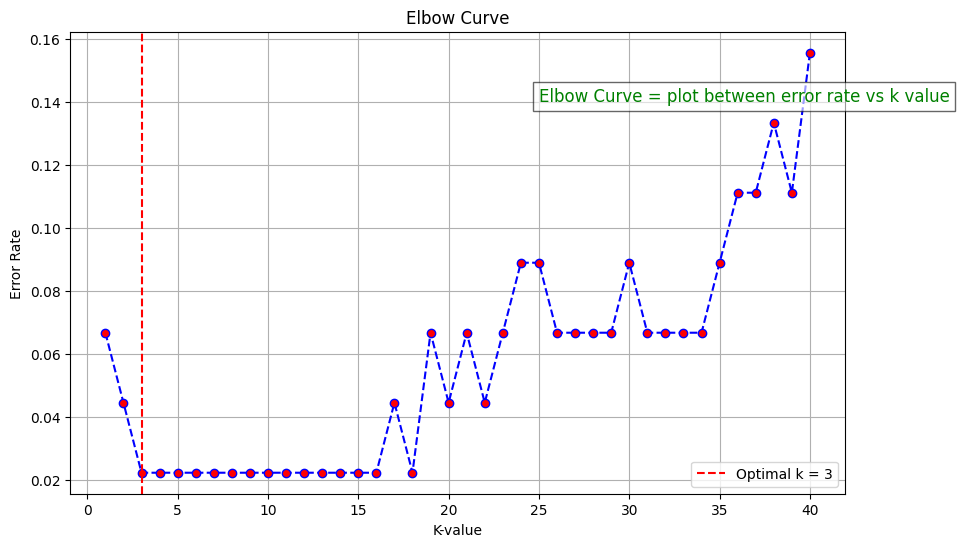

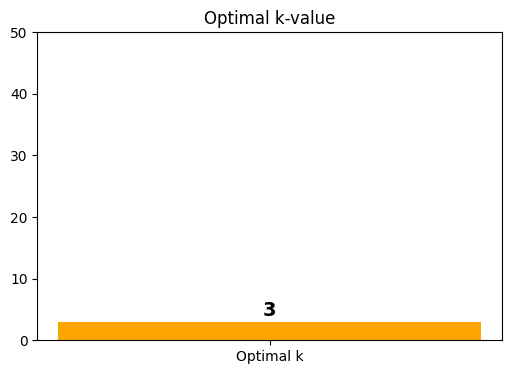

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling - important for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Variables to store error rates
error_rate = []

# Test k values from 1 to 40 and record error rates
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = np.mean(pred_k != y_test)  # Error rate: mean of misclassified samples
    error_rate.append(error)

# Find optimal k (with minimum error rate)
optimal_k = error_rate.index(min(error_rate)) + 1
print(f"Optimal k-value: {optimal_k}")

# Plot Error Curve: Error rate vs k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', marker='o')
plt.title('Error Curve: K-value vs Error Rate')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# Plot Elbow Curve with label, grid and optimal k line
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Elbow Curve')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.text(25, max(error_rate)*0.9, "Elbow Curve = plot between error rate vs k value", fontsize=12, color='green',
         bbox=dict(facecolor='white', alpha=0.6))
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f"Optimal k = {optimal_k}")
plt.legend()
plt.grid(True)
plt.show()

# Display Optimal k-value graphically with text label
plt.figure(figsize=(6, 4))
plt.bar(['Optimal k'], [optimal_k], color='orange')
plt.title('Optimal k-value')
plt.ylim(0, 50)
plt.text(0, optimal_k + 1, str(optimal_k), ha='center', fontsize=14, fontweight='bold')
plt.show()
